In [41]:
# Importing all the necessary modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = 'C:\\Users\\Amit_d_gr8\\ML Kaggle\\ML mastery\\iris_dataset.csv'
cols = ['sepal-length','sepal-width','petal-length','petal-width','class']
# Loading the dataset using pandas read_csv() funtion
data = pd.read_csv(filename, names = cols)

In [3]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Shape of the given dataset
data.shape

(150, 5)

In [5]:
# Description
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Class distribution
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

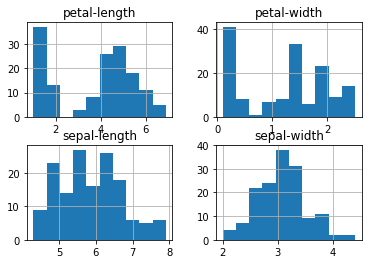

In [16]:
data.hist()
plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

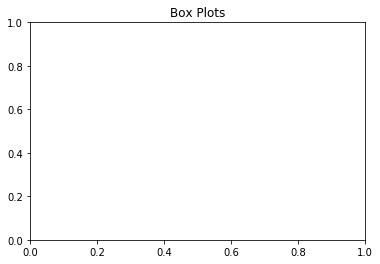

In [17]:
fig,ax = plt.subplots()
ax.set_title('Box Plots')
ax.boxplot(data)

In [18]:
data.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

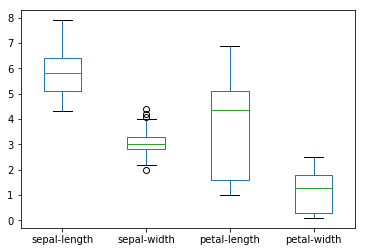

In [21]:
data.boxplot(column=['sepal-length','sepal-width','petal-length','petal-width'],grid=False,fontsize=10)

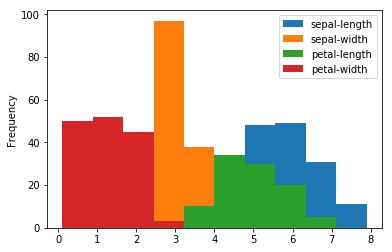

In [24]:
data.plot.hist()

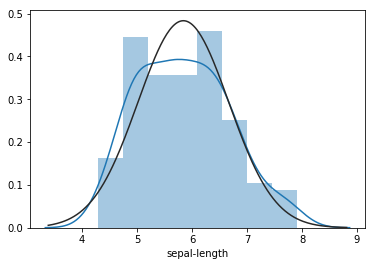

In [27]:
sns.distplot(data['sepal-length'],fit = norm)
# much Gaussian distribution

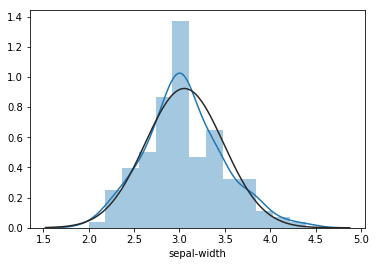

In [28]:
sns.distplot(data['sepal-width'],fit = norm)
# very much Gaussian distribution

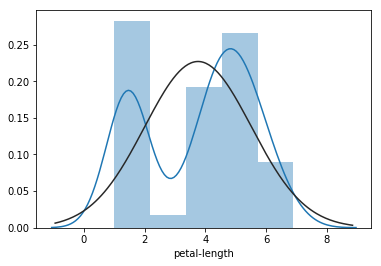

In [29]:
sns.distplot(data['petal-length'],fit = norm)

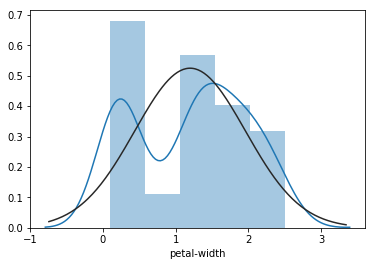

In [30]:
sns.distplot(data['petal-width'],fit = norm)

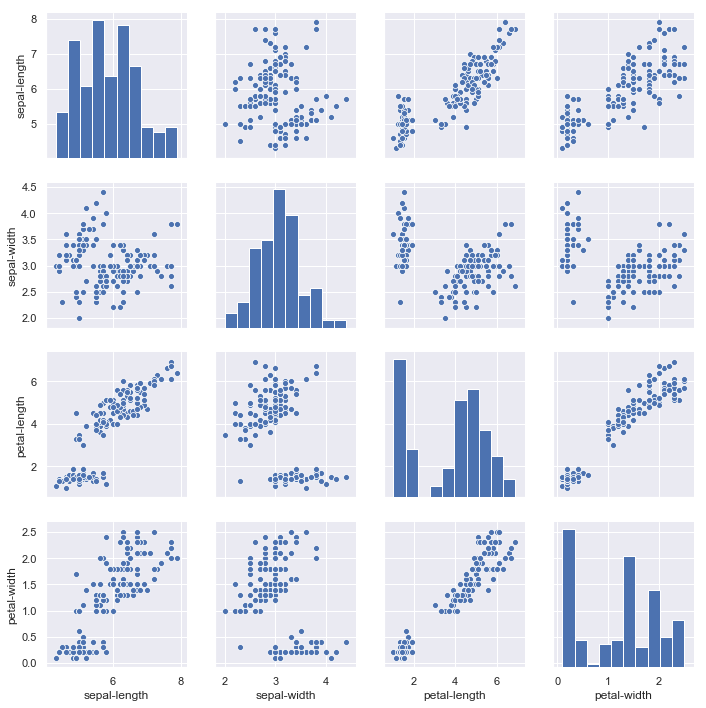

In [35]:
sns.set()
cols_for_plot = ['sepal-length','sepal-width','petal-length','petal-width']
sns.pairplot(data[cols_for_plot],size=2.5)

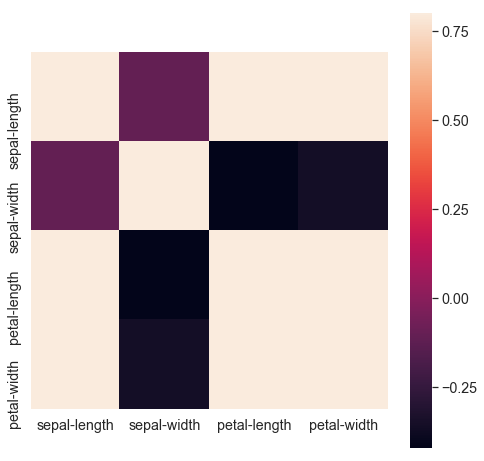

In [44]:
# Using correlation matrix
corrmat = data.corr()
# along with a heatmap
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corrmat,vmax=0.8,square=True)
# Analysing this is most imp
#Check for collinearity and the variables which influence our 
# target variables

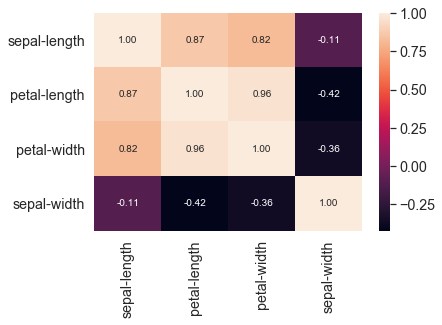

<Figure size 1080x864 with 0 Axes>

In [42]:
k=4 #number of columns in heatmap
cols = corrmat.nlargest(k,cols_for_plot).index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.3)
sns.heatmap(cm, cbar = True, annot=True, annot_kws={'size':10},fmt='0.2f',yticklabels=cols.values,xticklabels=cols.values)
plt.figure(figsize=(15,12))
plt.show()

In [45]:
data.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [48]:
data_y = data['class']
predictor_cols = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
data_X = data[predictor_cols]

X_train,X_val,y_train,y_val = train_test_split(data_X,data_y,test_size=0.2,random_state=7)

In [49]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [50]:
results = []
names = []

In [56]:
for name,model in models:
    kfold = KFold(n_splits=10,random_state=7)
    cv_results = cross_val_score(model, X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("{}: {} ({})".format(name,round(cv_results.mean(),5),round(cv_results.std(),5)))

LR: 0.96667 (0.04082)
LDA: 0.975 (0.03819)
KNN: 0.98333 (0.03333)
CART: 0.975 (0.03819)
NB: 0.975 (0.05336)
SVM: 0.99167 (0.025)


In [58]:
type(models)

list

In [98]:
# plt.figure(figsize=(10,8))
# f1,ax1 = plt.subplots()
# ax1.set_xticklabels(names)
# ax1.grid(False)
# ax1.set_title('Algorithm Comparison')
# plt.boxplot(results,manage_xticks=False)
# plt.show()

In [100]:
# Make Predictions
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_val)

In [101]:
accuracy_score(y_val,predictions)

0.9

In [102]:
confusion_matrix(y_val,predictions)

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  9]], dtype=int64)

In [105]:
print(classification_report(y_val,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

